## CJ Geometry
In this notebook, we aim to explore the CJ geometry and understand where the argon volume ends.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

fields = ["x", "y", "z", "time"]
filepath = os.path.join("..", "Data", "output_Muon_123456789.csv")
df = pd.read_csv(filepath, index_col=False)
df[fields].describe()

,x,y,z,time
count,333262.000000,333262.000000,333262.000000,3.332620e+05
mean,-88.576490,131.190801,203.040828,9.964905e+14
std,1023.786801,977.521887,1159.309405,1.613200e+17
min,-1950.000000,-1950.000000,-1950.000000,5.350400e+01
25%,-1101.880000,-615.610500,-809.701000,5.630130e+01
50%,-78.248900,212.511000,295.779000,5.950150e+01
75%,785.554000,821.224000,1257.430000,6.316980e+01
max,1942.800000,1949.960000,1950.000000,3.118410e+19


# Observations:
- the axis ranges in [-1950, +1950] mm, then the LAr volume is **1.95x1.95x1.95 m**
- then, the **thickness** of the LAr bulk is **0.05 m**


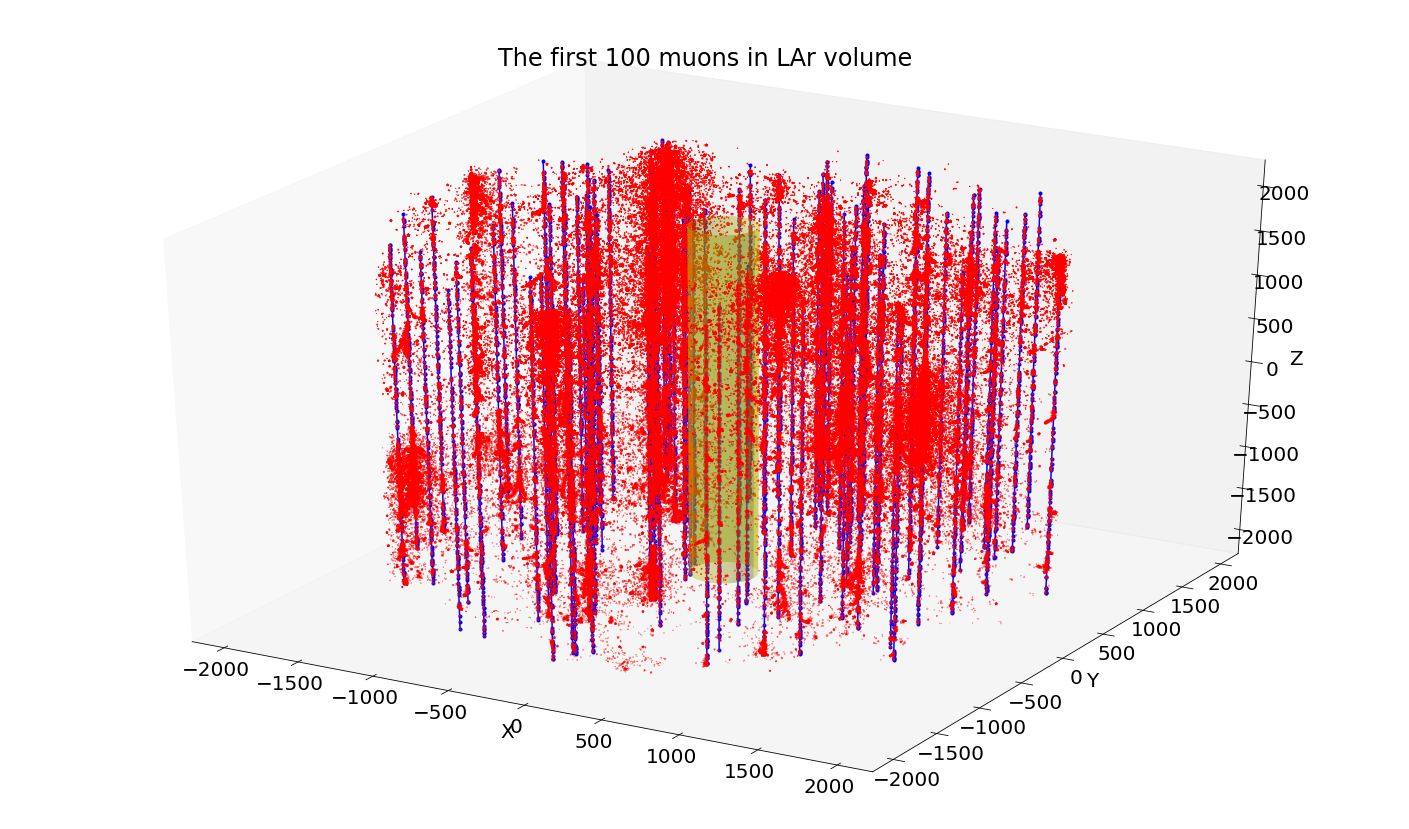

In [21]:
# try to plot cylinder
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Fibers Surface (cylinder of radius 20cm)
x=np.linspace(-1, 1, 100)
z=np.linspace(-10, 10, 100)
Xc, Zc = np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)
# scale cylinder to real size
Xc = Xc * 200    # 20 cm radius = 200 mm
Zc = Zc * 200
Yc = Yc * 200
# Draw parameters
ax.plot_surface(Xc, Yc, Zc, alpha=0.4, color='y')
ax.plot_surface(Xc, -Yc, Zc, alpha=0.4, color='y')

# Muon data (first N events)
num_events = 100
for event in range(num_events):
    muons = df[(df.eventnumber==event) & (df.PID==13)].sort_values("time")[["x", "y", "z"]]
    electrons = df[(df.eventnumber==event) & (df.PID==11) & (df.energydeposition>0)].sort_values("time")[["x", "y", "z", "energydeposition"]]
    X, Y, Z = muons["x"], muons["y"], muons["z"]
    ax.plot(X, Y, Z, c='b', marker='.')
    X, Y, Z, E = electrons["x"], electrons["y"], electrons["z"], electrons["energydeposition"]
    ax.scatter(X, Y, Z, c='r', marker='*', s=E/100)
    
ax.set_title("The first {} muons in LAr volume".format(num_events))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.grid(False)
plt.show()

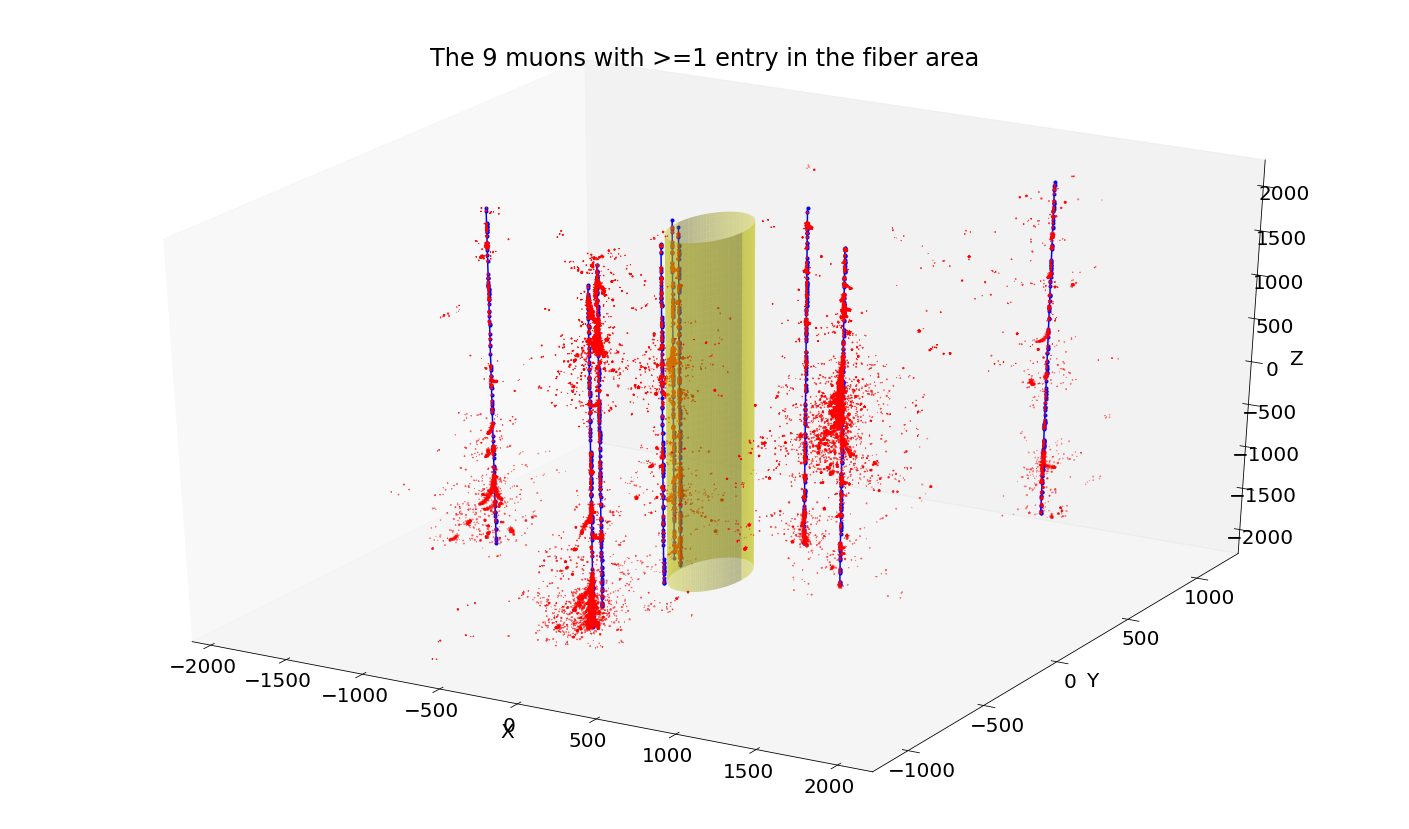

[Info] There are 9/100 events that enter in the fiber area with at least one particle.


In [17]:
# try to plot cylinder
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Fibers Surface (cylinder of radius 20cm)
x=np.linspace(-1, 1, 100)
z=np.linspace(-10, 10, 100)
Xc, Zc = np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)
# scale cylinder to real size
Xc = Xc * 200    # 20 cm radius = 200 mm
Zc = Zc * 200
Yc = Yc * 200
# Draw parameters
ax.plot_surface(Xc, Yc, Zc, alpha=0.4, color='y')
ax.plot_surface(Xc, -Yc, Zc, alpha=0.4, color='y')

# Plot events with at least 1 entry in the fiber area
small_df = df[((df.x**2 + df.y**2)**0.5 <= 200)]
events_contact_fibers = small_df.eventnumber.unique()
for event in events_contact_fibers:
    muons = df[(df.eventnumber==event) & (df.PID==13)].sort_values("time")[["x", "y", "z"]]
    electrons = df[(df.eventnumber==event) & (df.PID==11) & (df.energydeposition>0)].sort_values("time")[["x", "y", "z", "energydeposition"]]
    X, Y, Z = muons["x"], muons["y"], muons["z"]
    ax.plot(X, Y, Z, c='b', marker='.')
    X, Y, Z, E = electrons["x"], electrons["y"], electrons["z"], electrons["energydeposition"]
    ax.scatter(X, Y, Z, c='r', marker='*', s=E/100)
    
ax.set_title("The {} muons with >=1 entry in the fiber area".format(len(events_contact_fibers)))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.grid(False)
ax.axis("equal")
plt.show()

print("[Info] There are {}/{} events that enter in the fiber area with at least one particle.".format(len(events_contact_fibers), 100))

### Observations:
- **only 9** muon simulations (over 100) present at least one particle that enter in the fiber area (*cylinder with 20cm radius*). Consider that we haven't distinguished between particles, then the particle inside the fibers could be any kind of particle.
- then, **only the 10%** of the simulations could be observed by the fibers (*notice no scintillation*).
- looking at the kind of particle (*see below*), most of the particle inside the fibers are **electrons, gammas and muon particles**.

In [20]:
small_df.groupby("PID").count()

,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,...,detectornumber,creatorprocess,startx,starty,startz,randomseed,parentnucleusPID,nuclearx,nucleary,nuclearz
PID,,,,,,,,,,,,,,,,,,,,,
-12,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
-11,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
11,773,773,773,773,773,773,773,773,773,773,...,773,773,773,773,773,773,773,773,773,773
13,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
22,221,221,221,221,221,221,221,221,221,221,...,221,221,221,221,221,221,221,221,221,221
2112,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1000180400,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
